<a href="https://colab.research.google.com/github/Anil-matcha/GPT-4-Vision-Chatbot/blob/main/GPT_4_Vision_Parking_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "openai>=1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.8/217.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


--2023-11-07 14:41:24--  https://parkingtickets.org/wp-content/uploads/2020/05/multisign.jpg
Resolving parkingtickets.org (parkingtickets.org)... 3.16.60.147
Connecting to parkingtickets.org (parkingtickets.org)|3.16.60.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110065 (107K) [image/jpeg]
Saving to: ‘multisign.jpg’

multisign.jpg       100%[===================>] 107.49K  --.-KB/s    in 0.09s   

2023-11-07 14:41:24 (1.21 MB/s) - ‘multisign.jpg’ saved [110065/110065]



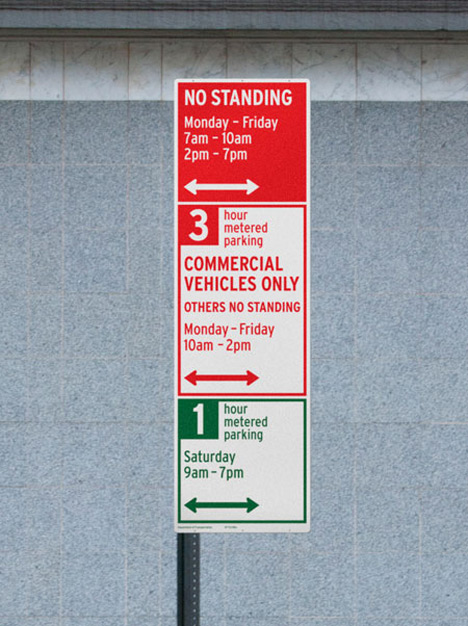

In [2]:
import cv2
from google.colab.patches import cv2_imshow
!wget https://parkingtickets.org/wp-content/uploads/2020/05/multisign.jpg
img = cv2.imread("multisign.jpg")
cv2_imshow(img)

In [5]:
import os
os.environ["OPENAI_API_KEY"] = "openai-key"
from openai import OpenAI

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "When can I park here ?"},
                {
                    "type": "image_url",
                    "image_url": "https://parkingtickets.org/wp-content/uploads/2020/05/multisign.jpg",
                },
            ],
        },
    ],
    max_tokens=300,
)

In [6]:
out = response.choices[0].message.content
print(out)

Based on the sign in the image, here's the parking information:

- No standing: Monday - Friday from 7am to 10am and from 2pm to 7pm. This means you cannot stop and leave your vehicle standing in this area during these times on weekdays.

- Commercial vehicles have 3-hour metered parking: Monday - Friday from 10am to 2pm. If you're driving a commercial vehicle, you can park here for up to 3 hours during these times on weekdays, as long as you pay the meter.

- General parking for non-commercial vehicles (outside the above restrictions): Before 7am and between 10am to 2pm (except commercial vehicles which are allowed with metered parking), and then after 7pm from Monday to Friday. 

- On Saturday, 1-hour metered parking is available from 9am to 7pm, presumably for both commercial and non-commercial vehicles.

Outside of these timeframes and on Sundays, the restrictions do not specify prohibitions, so you may be allowed to park there unless there are other unstated restrictions or local 